In [23]:
import pandas as pd
from sklearn import decomposition
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
#import plotly.plotly as py
#from plotly.graph_objs import *
#plt.rcParams['figure.figsize'] = (20.0, 14.0)
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [24]:
df=pd.read_csv("./vice.csv")
len(df)

5198

In [25]:
df.knowledgeArea.unique()

array(['Ingeniería y Tecnología', 'Ciencias Naturales',
       'Ciencias Médicas y de la Salud', 'Ciencias Sociales',
       'Ciencias Agrícolas', 'Humanidades'], dtype=object)

In [26]:
df.classification.unique()

array(['C', 'A', 'B', 'A1', 'reconocido'], dtype=object)

In [27]:
area=df.loc[df.knowledgeArea=='Ciencias Naturales']
grupo=df.loc[df.code=='COL0035995']
grupo

,IS,I,IJ,ED,EM,JI,EP,IVD,IVM,IVP,...,TM,TG,PID,PF,PERS,AP,APO,knowledgeArea,classification,code
248,0.0,2.0,6.0,3.0,4.0,0.0,7.0,2.0,6.0,7.0,...,5.61,22.11,3.18,0.0,0.0,1.82,0.0,Ciencias Naturales,A1,COL0035995


In [28]:
ga1=area.loc[area.classification=='A1']
ga1=ga1._get_numeric_data()
ga1=ga1.loc[:,:'APO']
ga=area.loc[area.classification=='A']
ga=ga.loc[:,:'APO']
gb=area.loc[area.classification=='B']
gb=gb.loc[:,:'APO']
gc=area.loc[area.classification=='C']
gc=gc.loc[:,:'APO']
grec=area.loc[area.classification=='reconocido']
grec=grec.loc[:,:'APO']
grupo=grupo.loc[:,:'APO']

In [29]:
ga1['categ']='A1'
ga['categ']='A'
gb['categ']='B'
gc['categ']='C'
grec['categ']='rec'
grupo['categ']='GRUPO'

res=ga1.copy()
#res=ga.copy()
#res=gb.copy()
#res=gc.copy()
res=res.append(ga)
res=res.append(gb)
res=res.append(gc)
res=res.append(grec)
print(len(res))
#res.head()

970


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [30]:
res.describe()

,IS,I,IJ,ED,EM,JI,EP,IVD,IVM,IVP,...,CCO,CCE,TD,TM,TG,PID,PF,PERS,AP,APO
count,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,...,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000
mean,0.723711,0.848454,2.080412,1.429897,1.584536,0.072165,1.015464,1.018557,2.312371,2.272165,...,3.662649,14.865567,0.746897,3.279918,5.778938,1.794794,0.123392,0.687134,1.425866,0.100206
std,1.086532,1.094466,1.889553,1.950823,2.311984,0.292578,1.977366,1.399420,2.705792,2.937630,...,3.039565,10.278853,1.555911,3.745204,5.289785,2.095427,0.671497,1.935156,2.495148,0.748219
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.680000,7.880000,0.000000,0.000000,1.680000,0.360000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,1.000000,...,2.940000,13.465000,0.000000,2.350000,4.780000,1.105000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,3.000000,2.000000,2.000000,0.000000,1.000000,2.000000,3.000000,3.000000,...,5.470000,20.027500,0.910000,5.050000,8.430000,2.480000,0.000000,0.000000,1.820000,0.000000
max,7.000000,7.000000,15.000000,21.000000,35.000000,3.000000,20.000000,11.000000,25.000000,24.000000,...,28.690000,70.590000,15.160000,24.620000,29.390000,16.020000,10.300000,21.520000,19.640000,10.990000


/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


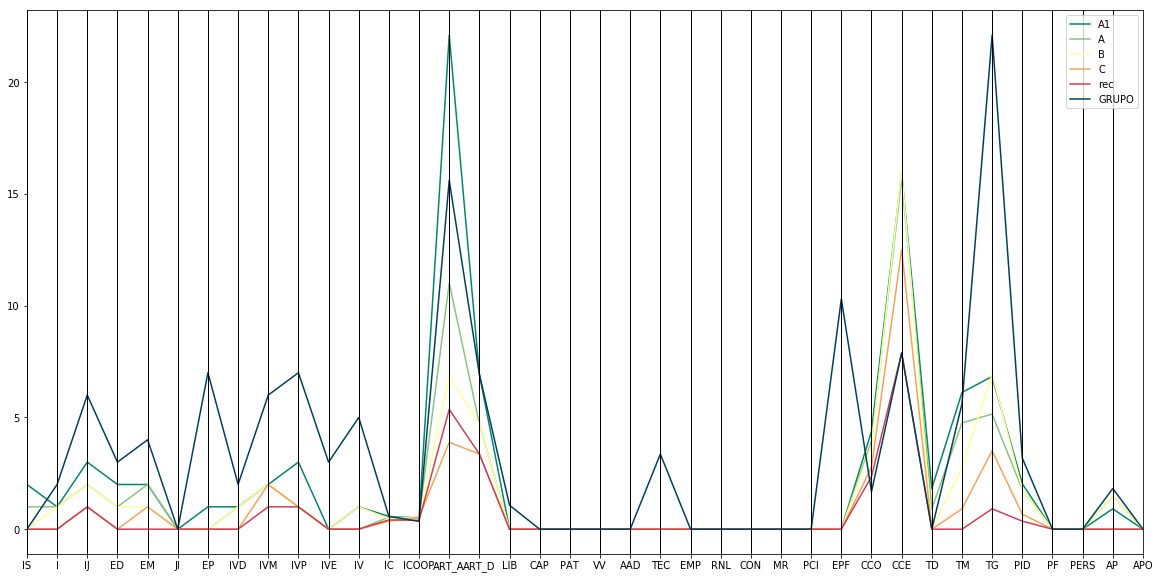

In [41]:
ga1des=ga1.describe()
#ga1des=ga1des.drop('max')
#ga1des=ga1des.loc[ga1des.index=='mean']
#ga1des=ga1des.loc[ga1des.index=='min']
ga1des['categ']='A1'
gades=ga.describe()
#gades=gades.drop('count')
gades['categ']='A'
gbdes=gb.describe()
#gbdes=gbdes.drop('count')
gbdes['categ']='B'
gcdes=gc.describe()
#gcdes=gcdes.drop('count')
gcdes['categ']='C'
grecdes=grec.describe()
#grecdes=grecdes.drop('min')
#grecdes=grecdes.loc[grecdes.index=='mean']
#grecdes=grecdes.loc[grecdes.index=='max']
grecdes['categ']='rec'

filtres=ga1des.copy()
#filtres=gades.copy()
#filtres=gbdes.copy()
#filtres=gcdes.copy()
filtres=filtres.append(gades)
filtres=filtres.append(gbdes)
filtres=filtres.append(gcdes)
filtres=filtres.append(grecdes)

#filtres=filtres.drop('mean')
#filtres=filtres.loc[filtres.index=='mean']
#filtres=filtres.loc[filtres.index=='max']
filtres=filtres.loc[filtres.index=='50%']

filtres=filtres.append(grupo)


          
pd.plotting.parallel_coordinates(filtres,'categ',color=('#00876c','#88c580','#ffff9d','#f7a258','#d43d51','#003f5c'))

axes=plt.axes()
axes.grid(False, which='both')

